In [7]:
import torch
from dataset import DATASET_FILE
from datasets import load_dataset

In [17]:
datasets = torch.load(DATASET_FILE, weights_only=False)
train_dataset = datasets["train_triplets"]
validation_dataset = datasets["val_triplets"]
test_dataset = datasets["test_triplets"]

In [18]:
train_dataset[:5]

[{'query': tensor([  101,  2054,  2003, 21144,  2050,   102,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0, 

In [21]:
import redis
import numpy as np

r = redis.Redis(host="localhost", port=6379, db=0)
raw = r.hget("doc:train_57095_6", "embedding")
vec = np.frombuffer(raw, dtype=np.float32)
print("Doc embedding norm:", np.linalg.norm(vec))

Doc embedding norm: 1.0


In [8]:
ms_marco_data = load_dataset("ms_marco", "v1.1")

Train: mean=70.9,  std=25.7,  min=3,  p50=71,  p95=112,  max=231
Val  : mean=70.9,  std=25.7,  min=4,  p50=71,  p95=112,  max=195
Test : mean=70.8,  std=25.6,  min=4,  p50=71,  p95=112,  max=211


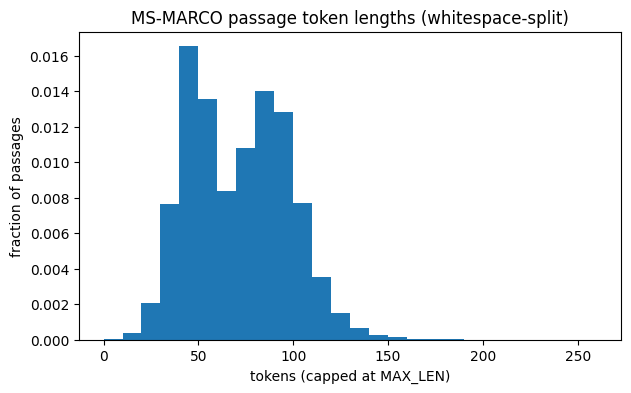

In [6]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset

MAX_LEN = 256            # same value you use in the tokenizer

# Load once (cached after first call)
ms_marco = load_dataset("ms_marco", "v1.1")

def passage_lengths(split="train"):
    """Return list of token counts (whitespace-split) for every passage in a split."""
    lens = []
    for row in ms_marco[split]:
        lens.extend(len(p.lower().split()[:MAX_LEN])
                     for p in row["passages"]["passage_text"])
    return lens

train_lens = passage_lengths("train")
val_lens   = passage_lengths("validation")
test_lens  = passage_lengths("test")

def summarise(name, arr):
    arr = np.asarray(arr)
    print(f"{name}: mean={arr.mean():.1f},  std={arr.std():.1f},  "
          f"min={arr.min()},  p50={np.percentile(arr,50):.0f},  p95={np.percentile(arr,95):.0f},  max={arr.max()}")

summarise("Train", train_lens)
summarise("Val  ", val_lens)
summarise("Test ", test_lens)

# ---- histogram (all splits together) ----
all_lens = np.concatenate([train_lens, val_lens, test_lens])
plt.figure(figsize=(7,4))
plt.hist(all_lens, bins=range(0, MAX_LEN+10, 10), density=True)
plt.title("MS-MARCO passage token lengths (whitespace-split)")
plt.xlabel("tokens (capped at MAX_LEN)")
plt.ylabel("fraction of passages")
plt.show()

In [9]:
ms_marco["train"][0]

{'answers': ['Results-Based Accountability is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole.'],
 'passages': {'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  'passage_text': ["Since 2007, the RBA's outstanding reputation has been affected by the 'Securency' or NPA scandal. These RBA subsidiaries were involved in bribing overseas officials so that Australia might win lucrative note-printing contracts. The assets of the bank include the gold and foreign exchange reserves of Australia, which is estimated to have a net worth of A$101 billion. Nearly 94% of the RBA's employees work at its headquarters in Sydney, New South Wales and at the Business Resumption Site.",
   "The Reserve Bank of Australia (RBA) came into being on 14 January 1960 as Australia 's central bank and banknote issuing authority, when the Reserve Bank Act 1959 removed the central banking functions from the C